# Part 1 ‐ Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
#Transforming logins json into dataframe with logins as a datetime object, 
#adding a column of 1 representing an instance of the login and then
#aggregating based on 15 minute time intervals
df_logins = pd.read_json('logins.json')
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'])
df_logins.set_index('login_time', inplace=True)
df_logins['new_column'] = 1
df_logins.rename(columns={'new_column' : 'agg_frequency'}, inplace=True)
df_aggregated = df_logins.resample('15T').sum()

In [3]:
#Checking results of the aggregation
df_aggregated.head()

,agg_frequency
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


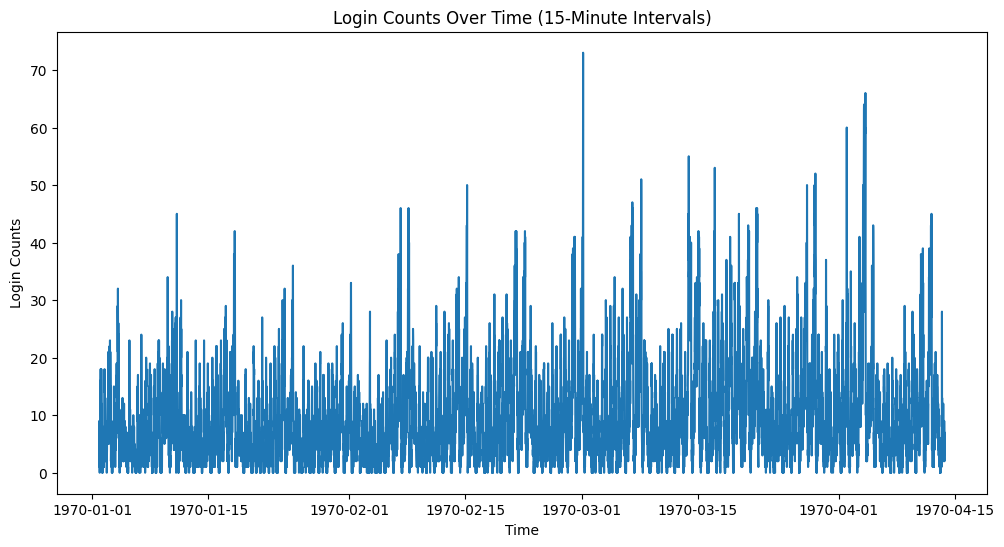

In [4]:
#Visualizing the login counts
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated.index, df_aggregated)
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.title('Login Counts Over Time (15-Minute Intervals)')
plt.show()

#### Within a 15 day period, there are typically two - three noticible spikes of login counts.
#### As the data contines into April 1970, the login spikes occur more frequently.

In [5]:
#Descriptive statistics of login counts
login_stats = df_aggregated['agg_frequency'].describe()
print(login_stats)

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: agg_frequency, dtype: float64


#### The largest login count for a sequential 15 minute block is 73, while the smallest is 0
#### The mean login count for a sequential 15 minute block is 9.5
#### The standard deviation for a sequential 15 minute block is 8.3

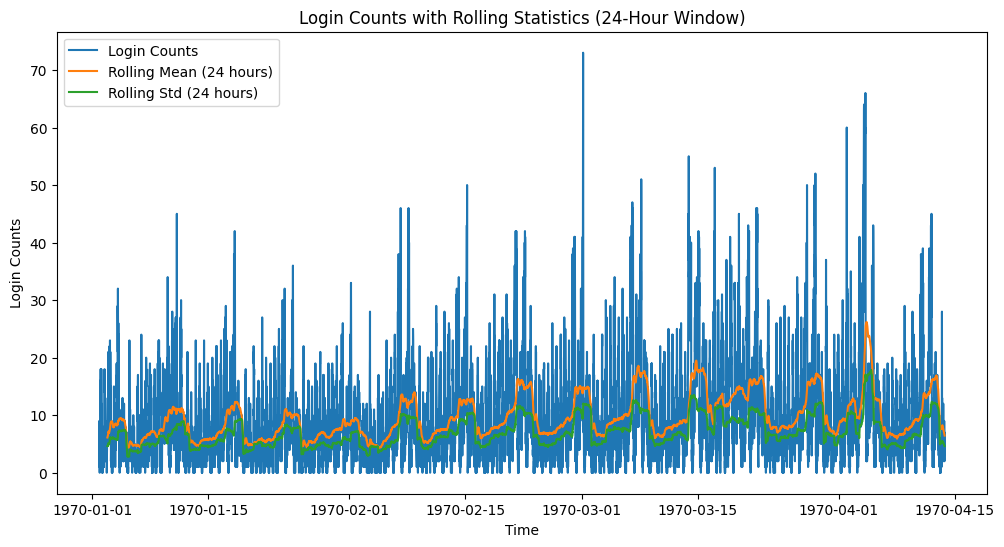

In [6]:
# Looking at daily cycles by plotting rolling mean and standard deviation
rolling_mean = df_aggregated.rolling(window=96).mean() 
rolling_std = df_aggregated.rolling(window=96).std()
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated.index, df_aggregated, label='Login Counts')
plt.plot(df_aggregated.index, rolling_mean, label='Rolling Mean (24 hours)')
plt.plot(df_aggregated.index, rolling_std, label='Rolling Std (24 hours)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.title('Login Counts with Rolling Statistics (24-Hour Window)')
plt.legend()
plt.show()

#### The plot above demonstrates how demand increases and falls on 24-hour basis.
#### The peaks of the of the rolling mean slightly increases as the data trends toward April.

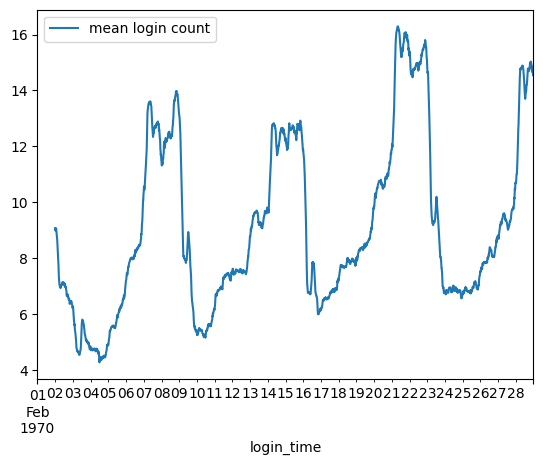

In [7]:
df_aggregated.loc['1970-02'].rolling(window=96).mean().plot()
plt.legend(['mean login count'])
plt.show()

#### The graph indicates that demand increase on the weekends.  However, there are also small dips on the weekend probably due to nighttime. 
#### I will investigate how the demand changes in one week.

In [8]:
datetime.datetime(1970, 3, 1).weekday()

6

#### The above return tells us that the first of March 1970 was on a Sunday.

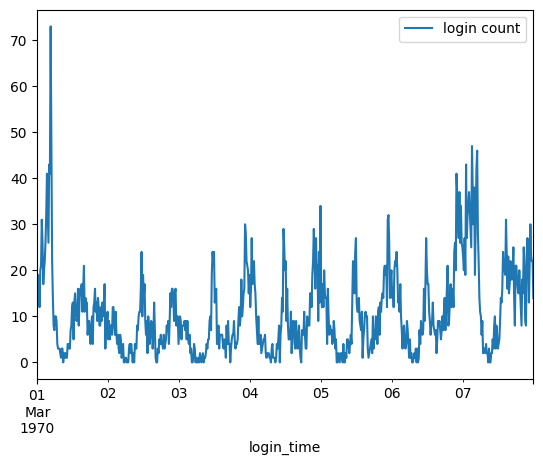

In [9]:
df_aggregated.loc['1970-03-01':'1970-03-07'].plot()
plt.legend(['login count'])
plt.show()

#### There is an upward trend in demand as the week progresses towards the weekend.  I will recreate the graph and smoothen out the changes using the mean.

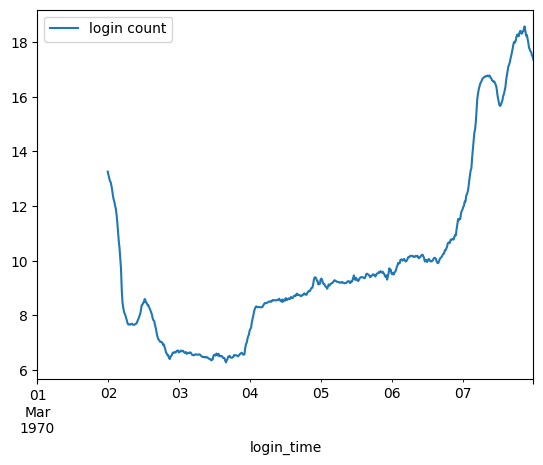

In [10]:
df_aggregated.loc['1970-03-01':'1970-03-07'].rolling(window=96).mean().plot()
plt.legend(['login count'])
plt.show()

#### We see a very sharp spike in demand over Saturday and into Sunday.
#### Now let's look at the demand change over the weekend.

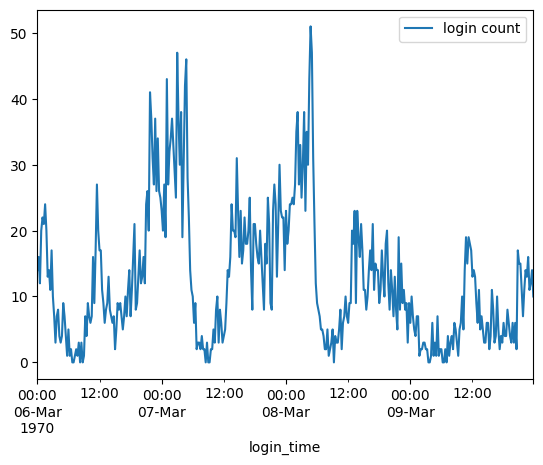

In [11]:
df_aggregated.loc['1970-03-06':'1970-03-09'].plot()
plt.legend(['login count'])
plt.show()

#### March 7th was a Saturday, and March 8th was a Sunday.
#### Interesting observation, midnight on Saturday and a little past midnight on Sunday had the login highest demand.
#### Let's compare that with a mid-week pair of days.

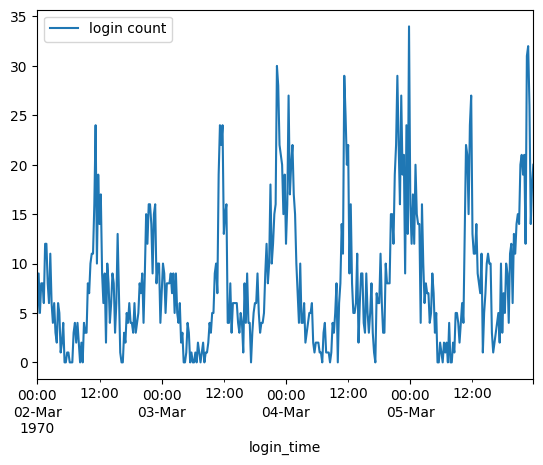

In [12]:
df_aggregated.loc['1970-03-02':'1970-03-05'].plot()
plt.legend(['login count'])
plt.show()

#### Midnight and noon on Tuesday and Wednesday had the highest demand.

## Conclusion:

#### Demand is highest on the weekends, at midnight especially.

#### Demand during the weekdays peak at midnight and noon.